# Logistic Regression


Goal of this exercise is predict whether a student gets admitted into a university.

From the past you know  for a number of students what their scores were on 2 admission exams. 
And you also know that after 3 years, they passed a final exam to the profession of ICS manager.
You will use this data to train a model of logistic regression. 
For new students, you want the 2 admission exams to determine if the student get's allowed in. 

In [1]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Import the necessary packages
# This time we are going to use an optimizer out of the scipy.optimize package. Abreviate this package to opt.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    # more on this later

Next, we read the data that we have

In [2]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Read the data from the file "ex2data1.txt" (available on Canvas) and display the top 5 rows of this data.
# Display also the top rows of this file

data = pd.read_csv('Data/ex2data1.txt', header = None)
X = data.iloc[:, :-1]  # select every row, then every column but the last one
y = data.iloc[:, -1]  # selec every row and the last column 
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


So we have two independent features and one dependent variable. Here 0 means candidate was unable to get an admission and 1 means our candidate got accepted.

## Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

In [3]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Create the mask variable:
mask = y == 1  # defining a mask to identify the good chips

In [4]:
mask

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: 2, Length: 100, dtype: bool

In [5]:
X[mask][1].values.size

60

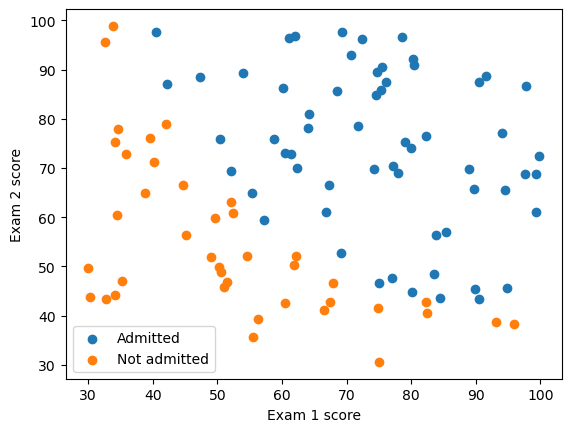

In [6]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Create the 2 scatter plots.
# One with the mask, identifying the good samples and one with the mask
# identifying the bad samples (= Not good).
# Keep all this code in 1 cell, as after each cell the output is drawn.
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)

# #################################################
# FILL IN THE NECESSARY CODE.
# Create the x and y labels for the chart.
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# #################################################
# FILL IN THE NECESSARY CODE.
# Add in a legend (as you have multiple scatterplots, you must provide a tupple of data points and a tupple of legend texts).
# Also draw the plot.
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

Let's define our sigmoid function.

## Sigmoid Function


In [7]:
# #################################################
# FILL IN THE NECESSARY CODE.

def sigmoid(x):
  return 1/(1+np.exp(-x))

Please implement the vectorized code. 

In this way our sigmoid can handle a scalar, a vector or a matrix or a tensor ;-). Of course writing and understanding the vectorized code takes some mind bending (which anyone will become good at after some practice). 

However, it gets rid of any for loops and also makes for efficient and generalized code.

## Cost Function
Let's implement the cost function for the Logistic Regression.


In [8]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Implement the cross-entropy loss function.
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))  # @ stands for matrix multiplication
    return J

There are multiple ways to code cost function. Whats more important is the underlying mathematical 
ideas and our ability to translate them into code.

## Gradient Function

In [9]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Implement the gradient function.
def gradient(theta, X, y):
   return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

Note that while this gradient looks identical to the linear regression gradient, the formula is 
actually different because linear and logistic regression have different definitions of 
hypothesis functions.

Let's call these functions using the initial parameters.

In [10]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Complement the X matrix with 1's. Reuse the X variable.
# Convert the labels into numpy arrays. Reuse the y variable.
# Initialize the parameters theta.
# Check your results for the cost function (J).

(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y.to_numpy()[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = costFunction(theta, X, y)
print(J)

0.6931471805599453


This should give us a value of 0.693 for J.

In [11]:
# Learning parameters using fmin_tnc

In the previous assignment, we found the optimal parameters of a linear regression model by implementing the gradient 
descent algorithm. We wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. 
This time, instead of taking the gradient descent steps, we will use a built-in function fmin_tnc from scipy library.
fmin_tnc is an optimization solver that finds the minimum of an unconstrained function. For logistic regression, you want 
to optimize the cost function with the parameters theta.

Constraints in optimization often refer to constraints on the parameters. For example, constraints that bound the possible 
values theta can take (e.g., theta = 1). Logistic regression does not have such constraints since theta is allowed to take 
any real value.

Concretely, you are going to use fmin_tnc to find the best or optimal parameters theta for the logistic regression cost 
function, given a fixed dataset (of X and y values). 

You will pass to fmin_tnc the following inputs:
* func: the name of the function for which the cost needs to be minimized. 
* x0: The initial values of the parameters we are trying to optimize (requires a matrix format, not a vector). Mind that the name chosen - x0 - is not in line with the current naming used in this course (or in the ML world). 
* fprime: the derivative of the function. So this refers to the gradient with respect to theta.
* args: These contain the arguments that the func and the fprime function will use. It contains the features and the labels.


In [12]:
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize._tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arr

In [13]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Call opt.fmin_tnc with the necessary parameters. 
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631551E-01   7.89087138E-01
    2    5  5.892425287224121E-01   7.39225941E+01
    3    7  4.227824376141017E-01   1.85266372E+01
    4    9  4.072926830765174E-01   1.68671186E+01
    5   11  3.818854956567495E-01   1.07734971E+01
    6   13  3.786234756676171E-01   2.31585015E+01
tnc: stepmx = 1000
    7   16  2.389267275374811E-01   3.00820494E+00
    8   18  2.047203829271571E-01   1.52224031E-01
    9   20  2.046713859363659E-01   6.62489854E-02
   10   22  2.035303176614651E-01   9.30772192E-04
tnc: fscale = 32.7777
   11   24  2.035293535585507E-01   8.07486995E-06
   12   26  2.035251133009459E-01   1.80177414E-04
   13   28  2.034984109185634E-01   5.02814768E-04
   14   30  2.034978383140605E-01   9.92459010E-06
   15   32  2.034977907767076E-01   3.77680317E-06
   16   34  2.034977389327010E-01   1.94873221E-05
   17   36  2.034977015894747E-01   2.29120580E-13


Note on flatten() function: Unfortunately scipy's fmin_tnc doesn't work well with column or row vector. 

It expects the parameters to be in an array format. The flatten() function reduces a column or row vector into an array format.

The output of above function is a tuple whose first element contains the optimized values of theta

In [14]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Extract the optimized theta values from the result of the calculation. 
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131863   0.20623159   0.20147149]


The above code should give [-25.16131862, 0.20623159, 0.20147149].

If you have completed the costFunction correctly, fmin_tnc will converge on the right optimization parameters and return 
the final values of theta. Notice that by using fmin_tnc, you did not have to write any loops yourself, or set a learning 
rate like you did for gradient descent. This is all done by fmin_tnc:-) You only needed to provide a function for calculating 
the cost and the gradient.

Let's use these optimized theta values to calculate the cost.

In [15]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Call the cost function again and verify your results.
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print('Cost:',J)

Cost: 0.2034977015894747


You should see a value of 0.203 . Compare this with the cost 0.693 obtained using the initial theta.

## Plotting Decision Boundary (Optional)
Let's superinmpose our findings (the linear boundary) on the dataset we drew above.

So make a copy of your scatterplot code for the admissioned and non-admissioned data.

As we have a linear boundary and as a line is determined by 2 points, determine a good start- and end-point for x.


In [16]:
# #################################################
# FILL IN THE NECESSARY CODE.
# We will need to draw a line on our scatter plot.
# 1. Find a good range for the x parameter. 
# 2. We need a minimum value for x and a maximum value for x (use the variable plot_x).
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]

# 3. The y intercept and slope calculation is given, based on the optimized theta.
y_int = -theta_optimized[0]/theta_optimized[2]
slope = -theta_optimized[1]/theta_optimized[2]

print('slope: ', slope)
print('y-intercept: ', y_int)

slope:  -1.0236266795476638
y-intercept:  124.88774018263557


Your results should be:

slope:  -1.0236266803084346

y-intercept:  124.88774021500586

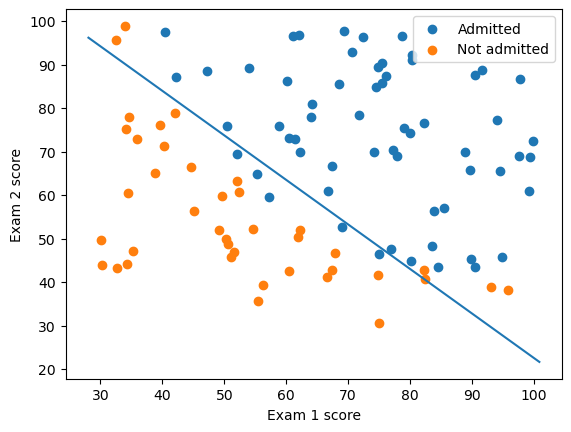

In [17]:
# #################################################
# FILL IN THE NECESSARY CODE.
# 4. Calculate, using the optimized theta values, the corresponding values for our line (variable plot_y).
plot_y = (y_int + np.dot(slope,plot_x))  

# 5. plot the line
decision_boun = plt.plot(plot_x, plot_y)

# 6. Copy your scatterplot drawing code here to
#    Mind that we augmented our X-matrix with 1's.
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [18]:
# #################################################
# FILL IN THE NECESSARY CODE.
# Determine the accuracy of the separation (how many were classified correctly based on the final result (=adimtted or not))
#   cutoff: parameter will determine from which value (sigmoid output, so between 0 and 1), 
#           whichwe will classify someone as admitted or not.
# Returns a number between 0 and 100

def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    return(acc * 100)

accuracy(X, y.flatten(), theta_optimized, 0.5)

89.0

This should give us an accuracy score of 89%.
You now have learnt how to perform Logistic Regression. Well done!
You can find the next post in this series here.